In [ ]:
#Priyanshu Pansari 21122037 
#Q1 
#ans- No, it is not necessary to shuffle the training data as in full batch gradient descent we take average of gradients of all training example in a single epoch and then update the parameters using this mean gradient.

In [176]:
#Q2 Implement basic Gradient Descent in a jupyter notebook.
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.preprocessing as sk

In [214]:
def gradient_descent(x,y,parameters,types='mse',iterations=10000,learning_rate=0.0001):
    w=parameters["W"]
    b=parameters["b"]
    print(w,b)
    costh=[]
    for i in range(iterations):
        y_pred=f(w,b,x)
        if types=='mse':
            cost,dw,db=mse(x,y,y_pred)
        elif types=='mae':
            cost,dw,db=mae(x,y,y_pred)
        costh.append(cost)
        w-= learning_rate*dw
        b-= learning_rate*db
        if i%100==0:
            print(f"Iteration{i+1}: Cost {cost}, Weight {w}, Bias {b}")
    return w,b,costh

In [215]:
#for linear regression
def f(w,b,x):
    yy=np.dot(w,x)+b
    return yy
def mae(x,y,y_pred):
    n=x.shape[1]
    dwf= -1/n*np.sum(np.sign(y-y_pred)*x,axis=1)
    dbf= -1/n*np.sum(np.sign(y-y_pred))
    cost= np.sum(abs((y-y_pred))) / len(y)
    return cost,dwf,dbf

def mse(x,y,y_pred):
    n=x.shape[1]
    dwf=-2/n*np.dot(x,(y-y_pred).T)
    dbf=-1/n*np.sum(np.sign(y-y_pred))
    cost=np.sum((y-y_pred)**2) / len(y)
    return cost,dwf,dbf

In [216]:
np.random.seed(0)

In [235]:
def main():
    iter=400
    index=[i for i in range(1,iter+1)]
    # Data
    lr=[0,0.0001,0.0003,0.001,0.003,0.01]
    color=['red','blue','orange','green','brown','yellow']
    parameters={'W':np.random.randn(2,),'b':np.random.randn(1,)[0]}
    X = np.array([[0,1], [1,2], [2,2], [3,5], [4,8],[5,3], [6,4], [7,2], [8,9]]).T
    Y = np.array([0,1,3,2,1,8,9,13,8])
    figure, axis = plt.subplots(3, 1,figsize=(15,15))
    for i in range(6):
        # Estimating weight and bias using gradient descent
        W,b,costh1 = gradient_descent(X, Y,parameters,'mse',iterations=iter,learning_rate=lr[i])
        print(f"Estimated Weight: {W}\nEstimated Bias: {b}")
        axis[0].plot(index,costh1,color=color[i])
        # Making predictions using estimated parameters
        Y_pred = f(W,b,X)
    axis[0].legend(lr)
    axis[0].set_title("mse")
    for i in range(6):
        # Estimating weight and bias using gradient descent
        W,b,costh2 = gradient_descent(X, Y,parameters,'mae',iterations=iter,learning_rate=lr[i])
        print(f"Estimated Weight: {W}\nEstimated Bias: {b}")
        axis[1].plot(index,costh2,color=color[i])
        # Making predictions using estimated parameters
        Y_pred = f(W,b,X)
    axis[1].legend(lr)
    axis[1].set_title("mae")
    j=1
    W,b,costh1 = gradient_descent(X, Y,parameters,'mse',iterations=iter,learning_rate=lr[j])
    W,b,costh2 = gradient_descent(X, Y,parameters,'mae',iterations=iter,learning_rate=lr[j])
    axis[2].plot(index,costh1,color=color[0])
    axis[2].plot(index,costh2,color=color[1])
    axis[2].legend(['mse','mae'])
    axis[2].set_title("mae vs mse")
    #print(Y_pred)

[-0.18718385  1.53277921] 1.469358769900285
Iteration1: Cost 39.083169513432004, Weight [-0.18718385  1.53277921], Bias 1.469358769900285
Iteration101: Cost 39.083169513432004, Weight [-0.18718385  1.53277921], Bias 1.469358769900285
Iteration201: Cost 39.083169513432004, Weight [-0.18718385  1.53277921], Bias 1.469358769900285
Iteration301: Cost 39.083169513432004, Weight [-0.18718385  1.53277921], Bias 1.469358769900285
Estimated Weight: [-0.18718385  1.53277921]
Estimated Bias: 1.469358769900285
[-0.18718385  1.53277921] 1.469358769900285
Iteration1: Cost 39.083169513432004, Weight [-0.18766265  1.52934819], Bias 1.4693254365669517
Iteration101: Cost 31.338759389121364, Weight [-0.17530484  1.25623129], Bias 1.4659921032336187
Iteration201: Cost 27.107378333572246, Weight [-0.09630218  1.06773779], Bias 1.4626587699002858
Iteration301: Cost 23.839652973033516, Weight [0.00654872 0.91954847], Bias 1.4593254365669528
Estimated Weight: [0.11426316 0.79378543]
Estimated Bias: 1.45602543

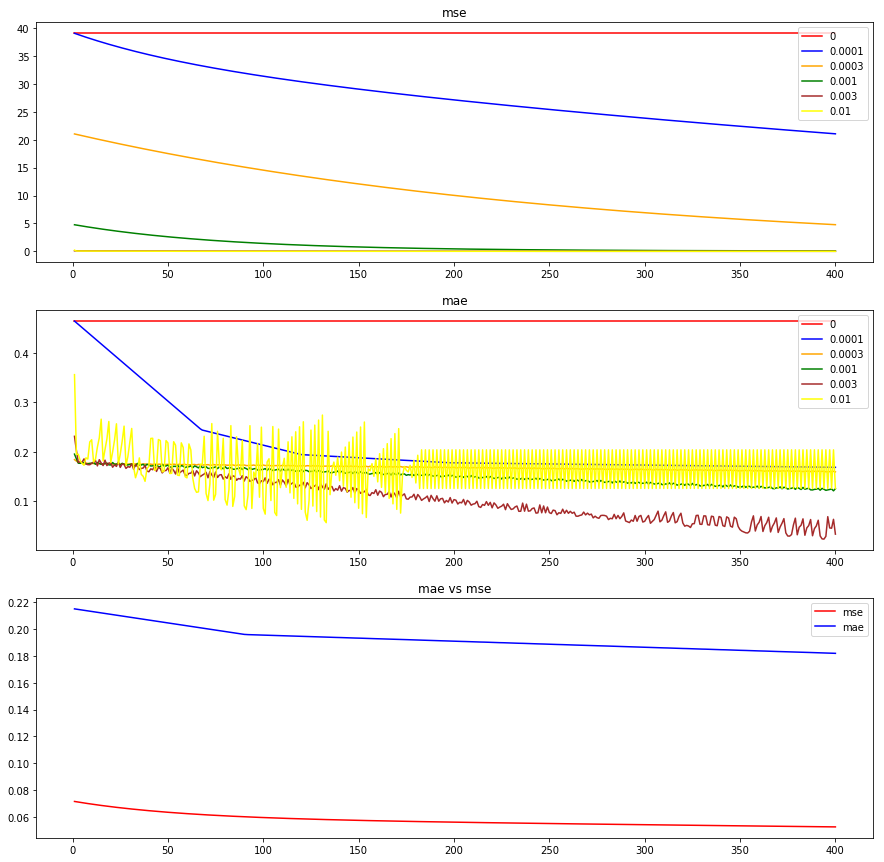

In [236]:
main()